# Detecting Molecules with Rotational Cooling Test Setup

Couldn't see anything on the the signal from chamber 2 so averaging a bunch of traces together.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import h5py 
import matplotlib.pyplot as plt

In [366]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

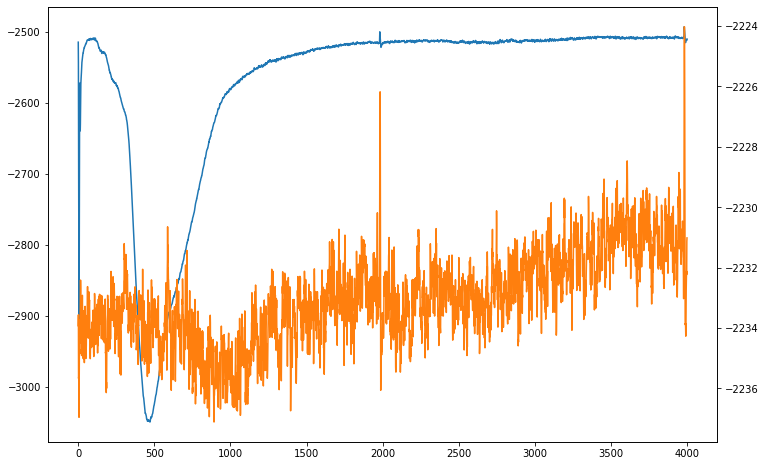

In [84]:
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573676837 test']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    for idx, measurement_name in enumerate(measurement_names):
        values[idx,:,:] = pxie[measurement_name].value

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[:,:,0].T.mean(axis = 1));
ax1 = ax.twinx()
ax1.plot(values[:,:,2].T.mean(axis = 1), 'C1');

Very small signal visible in chamber 2 ~5ms behind the signal in chamber 1, as expected (1m in 200m/s) 

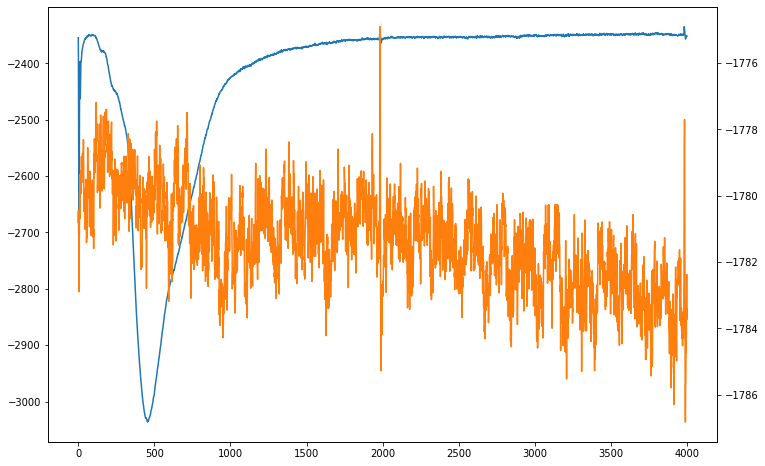

In [85]:
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573678972 test']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    for idx, measurement_name in enumerate(measurement_names):
        values[idx,:,:] = pxie[measurement_name].value

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[:,:,0].T.mean(axis = 1));
ax1 = ax.twinx()
ax1.plot(values[:,:,2].T.mean(axis = 1), 'C1');

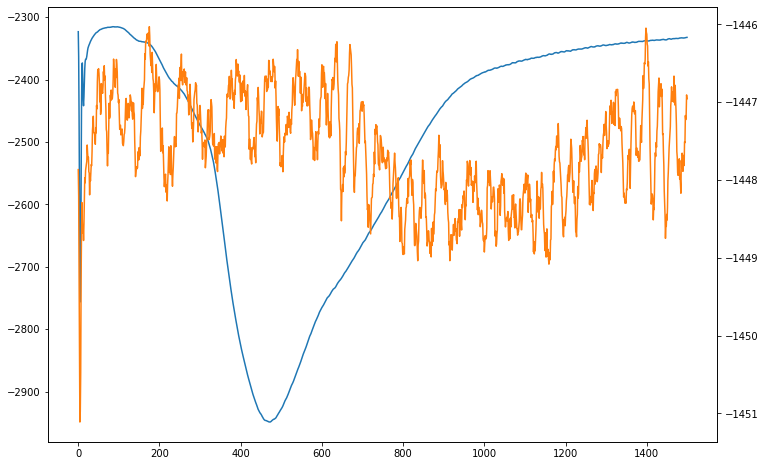

In [426]:
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573685677 test']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    for idx, measurement_name in enumerate(measurement_names):
        values[idx,:,:] = pxie[measurement_name].value

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[:,:,0].T.mean(axis = 1));
ax1 = ax.twinx()
ax1.plot(values[:,:,2].T.mean(axis = 1), 'C1');

peak_first_chamber = values[:,:,0].T.mean(axis = 1)

integral of signal in second chamber = 4979


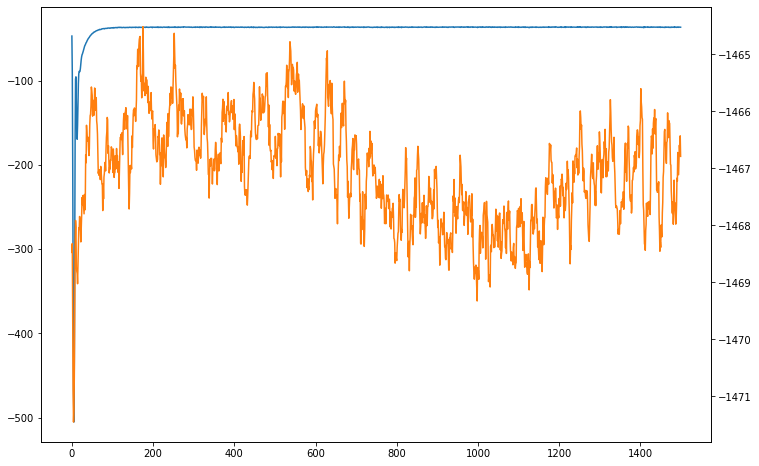

In [112]:
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573686343 test']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    for idx, measurement_name in enumerate(measurement_names):
        values[idx,:,:] = pxie[measurement_name].value

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[:,:,0].T.mean(axis = 1));
ax1 = ax.twinx()
ax1.plot(values[:,:,2].T.mean(axis = 1), 'C1');

val = values[:,:,2].T.mean(axis = 1)
integral = int(np.trapz(val[400:1500]) - 1100*np.trapz(val[100:400])/300)
print(f'integral of signal in second chamber = {-integral:d}')

Checking if the signal size increases if the laser in chamber 1 is not on (no depletion of population, both lasers are on same frequency)

## Scanning frequency of laser in chamber after rotational cooling chamber

In [427]:
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573686609 test']
    tstart = grp.attrs['time_offset']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    lock = dset['Laser Lock'].value
    bristol = dset['Bristol671A'].value
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    pxie_timestamp = np.empty(len(measurement_names))
    for idx, measurement_name in enumerate(measurement_names):
        values[idx,:,:] = pxie[measurement_name].value
        pxie_timestamp[idx] = pxie[measurement_name].attrs['ch0 : timestamp']
    values = values[indices_sort,:,:]
    pxie_timestamp = pxie_timestamp[indices_sort]

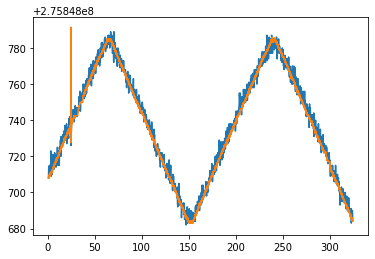

In [428]:
plt.plot(bristol['time'], bristol['frequency']*1e6)
plt.plot(lock['time'], bristol['frequency'][0]*1e6+lock['laser 1 frequency']-lock['laser 1 frequency'][0])

In [429]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [430]:
time_pxie = np.linspace(0,len(values)-1,len(values))*1/25+pxie_timestamp[0]
indices_nearest = []
for t in time_pxie:
    indices_nearest.append(find_nearest_idx(lock['time'], t))

In [431]:
bins = np.arange(130,260,5)
indices_bins = np.digitize(lock['laser 1 frequency'][indices_nearest], bins)
freq_means = np.array([lock['laser 1 frequency'][indices_nearest][indices_bins == i].mean() for i in range(1, len(bins))])
bin_means = np.array([values[:,:,2][indices_bins == i].mean(axis = 0) for i in
                      range(1, len(bins))])

integral = []
for bm in bin_means:
    integral.append(np.abs(np.trapz(bm[400:1500]) - 1100*np.trapz(bm[100:400])/300))
    
freq_means += bristol['frequency'][0]*1e6-lock['laser 1 frequency'][0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.


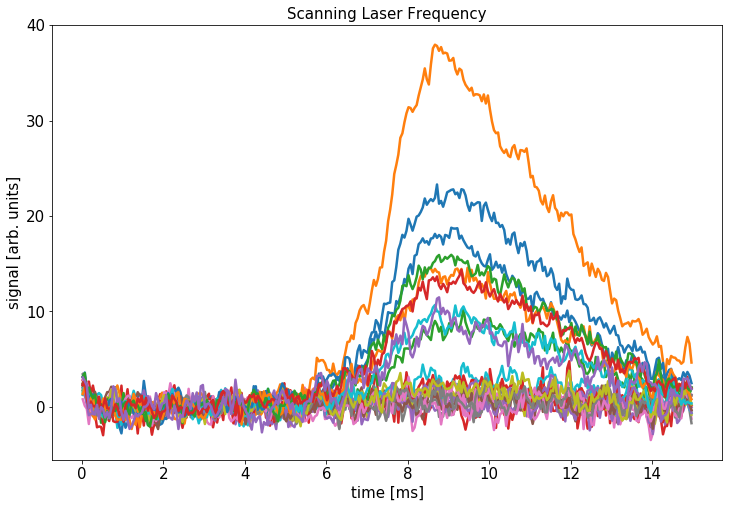

In [488]:
def average_every_n(array, n):
    assert len(array)%n == 0, 'not integer divisible'
    return np.reshape(array, [len(array)//n, n]).mean(axis = 1)

t = np.linspace(0,1499,1500)/100
fig, ax = plt.subplots(figsize = (12,8))
for idx in range(len(bin_means)):
    ax.plot(average_every_n(t, 5), average_every_n(-(bin_means[idx]-bin_means[idx][100:400].mean()), 5), lw = 2.5)

ax.set_title('Scanning Laser Frequency')
ax.set_xlabel('time [ms]')
ax.set_ylabel('signal [arb. units]')
set_fontsize(ax, 15)
fig.savefig('scan_frequency_plot_pulse.png', dpi = 300)

Much larger signal, frequency most likely off compared to chamber 1 due to being sensitive to a different velocity range.

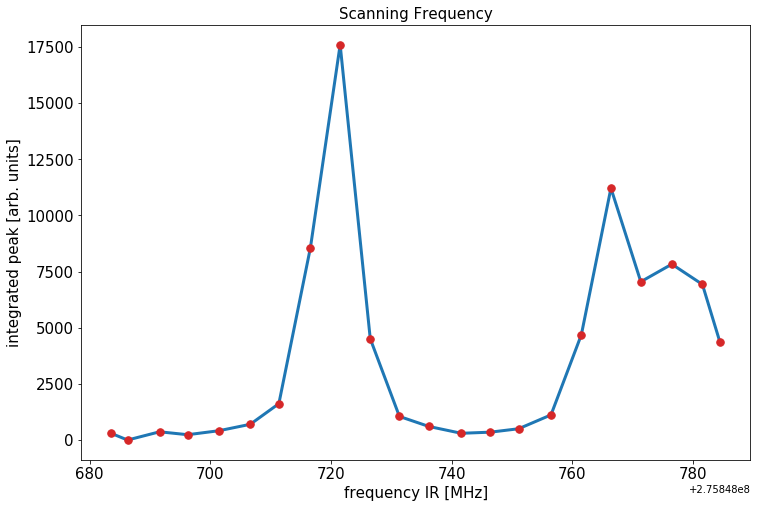

In [495]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(freq_means, integral-np.nanmin(integral), lw = 3)
ax.plot(freq_means, integral-np.nanmin(integral), 'C3.', ms = 15)
ax.set_xlabel('frequency IR [MHz]')
ax.set_ylabel('integrated peak [arb. units]')
ax.set_title('Scanning Frequency')
set_fontsize(ax, 15)

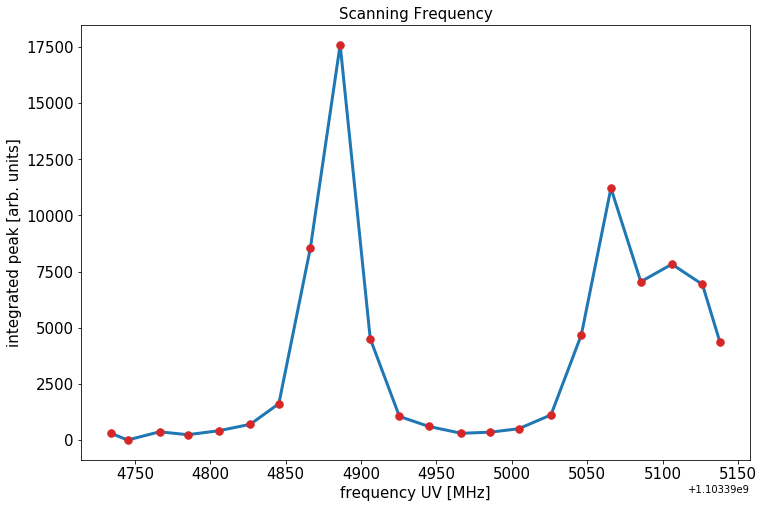

In [494]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(freq_means*4, integral-np.nanmin(integral), lw = 3)
ax.plot(freq_means*4, integral-np.nanmin(integral), 'C3.', ms = 15)
ax.set_xlabel('frequency UV [MHz]')
ax.set_ylabel('integrated peak [arb. units]')
ax.set_title('Scanning Frequency')
set_fontsize(ax, 15)
fig.savefig('scan_frequency_plot_integral.png', dpi = 300)

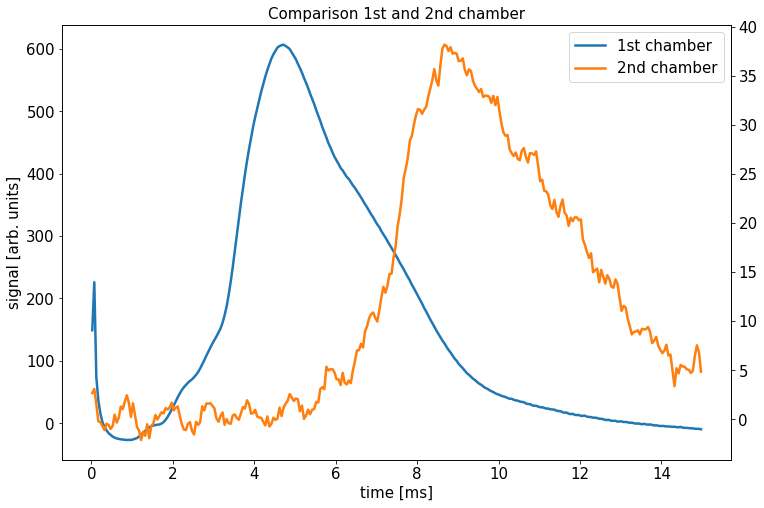

In [484]:
t = np.linspace(0,1499,1500)/100
idx_max = np.nanargmax(integral)

fig, ax = plt.subplots(figsize = (12,8))
l1 = ax.plot(average_every_n(t, 5), average_every_n(-(peak_first_chamber-peak_first_chamber[-300:].mean()), 5), lw = 2.5, label = '1st chamber')
ax1 = ax.twinx()
l2 = ax1.plot(average_every_n(t, 5), average_every_n(-(bin_means[idx_max]-bin_means[idx_max][50:150].mean()), 5), 'C1', lw = 2.5, label = '2nd chamber')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize = 15)

ax.set_title('Comparison 1st and 2nd chamber')
ax.set_xlabel('time [ms]')
ax.set_ylabel('signal [arb. units]')
set_fontsize(ax, 15)
set_fontsize(ax1, 15)

fig.savefig('compare_1st_2nd_twinx.png', dpi = 300)

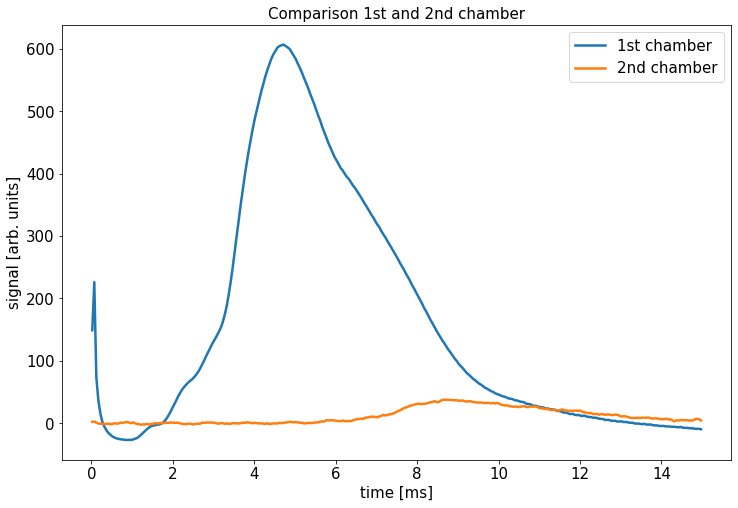

In [485]:
t = np.linspace(0,1499,1500)/100
idx_max = np.nanargmax(integral)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(average_every_n(t, 5), average_every_n(-(peak_first_chamber-peak_first_chamber[-300:].mean()), 5), lw = 2.5, label = '1st chamber')
ax.plot(average_every_n(t, 5), average_every_n(-(bin_means[idx_max]-bin_means[idx_max][100:400].mean()), 5), 'C1', lw = 2.5, label = '2nd chamber')
ax.legend(fontsize = 15)

ax.set_title('Comparison 1st and 2nd chamber')
ax.set_xlabel('time [ms]')
ax.set_ylabel('signal [arb. units]')
set_fontsize(ax, 15)
set_fontsize(ax1, 15)
fig.savefig('compare_1st_2nd.png', dpi = 300)

In [608]:
from tqdm import tqdm_notebook as tqdm
data_dir = 'D:/Rotational Cooling/'
fname = '2019_11_13_test.hdf'

with h5py.File(data_dir+fname, 'r') as f:
    grp = f['1573685677 test']
    tstart = grp.attrs['time_offset']
    dset = grp['readout']
    pxie = dset['PXIe-5171']
    lock = dset['Laser Lock'].value
    bristol = dset['Bristol671A'].value
    mirror = dset['ZaberTMM'].value
    
    measurement_names = list(pxie.keys())[:-1]
    measurement = [int(name.split('_')[-1]) for name in measurement_names]
    indices_sort = np.argsort(measurement)
    values = np.empty([len(measurement_names), *pxie[measurement_names[0]].value.shape])
    pxie_timestamp = np.empty(len(measurement_names))
    for idx, measurement_name in tqdm(enumerate(measurement_names), total = len(measurement_names)):
        values[idx,:,:] = pxie[measurement_name].value
        pxie_timestamp[idx] = pxie[measurement_name].attrs['ch0 : timestamp']
    values = values[indices_sort,:,:]
    pxie_timestamp = pxie_timestamp[indices_sort]

In [1060]:
time_pxie = np.linspace(0,len(values)-1,len(values))*1/25+pxie_timestamp[0]
indices_nearest = []
for t in time_pxie:
    indices_nearest.append(find_nearest_idx(mirror['time'], t))

In [1021]:
bins = np.arange(0,max(indices_nearest),1)
indices_bins = np.digitize(indices_nearest, bins)
means = np.array([values[:,:,0][indices_bins == i].mean(axis = 0) for i in range(1,len(bins))])

integral_all = np.trapz(values[:,400:1200,0], axis = 1)-800*np.trapz(values[:,1400:1500,0], axis = 1)/100

x = np.array([mirror['x'][indices_nearest][indices_bins == i].mean() for i in range(1, len(bins))])
y = np.array([mirror['y'][indices_nearest][indices_bins == i].mean() for i in range(1, len(bins))])

# integral = np.array([integral_all[indices_bins == i].mean(axis = 0) for i in range(1,len(bins))])
# integral[integral > 0] = 0
# integral *= -1
integral = np.empty(len(means))
for idx, m in tqdm(enumerate(means), total = len(means)):
    integral[idx] = np.trapz(m[400:1200]) - 800*np.trapz(m[1400:1500])/100
    
integral[integral > 0] = 0 
integral *= -1
integral /= integral.max()

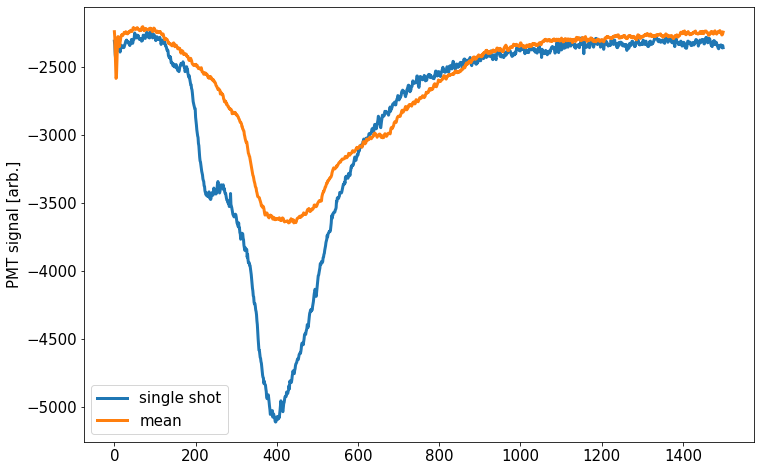

In [1022]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[integral_all.argmin(),:,0], lw = 3, label = 'single shot')
ax.plot(means[integral.argmax()], lw = 3, label = 'mean')

ax.set_ylabel('PMT signal [arb.]')
ax.legend(fontsize = 15)
set_fontsize(ax,15)

10716,4998
integral : 0.85


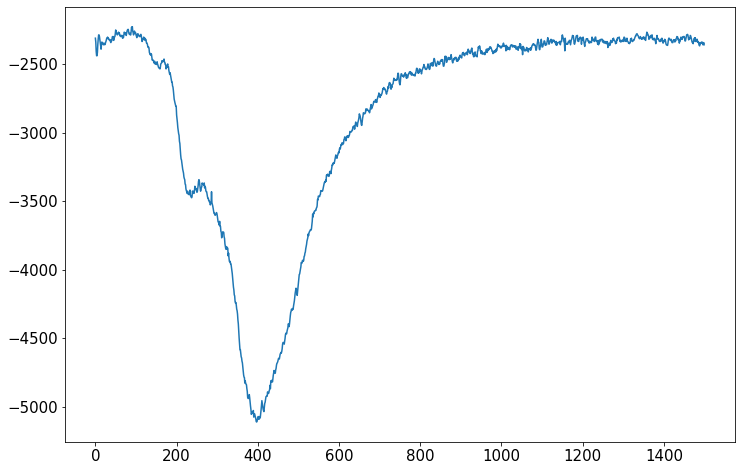

In [1067]:
idx = find_nearest_idx(mirror['time'], time_pxie[integral_all.argmin()])
print(f"{mirror['x'][idx]},{mirror['y'][idx]}")
print(f"integral : {integral[idx]:.2f}")

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(values[integral_all.argmin(),:,0]);
set_fontsize(ax, 15)

In [1085]:
indices_nearest[4832]

911

In [1087]:
np.where(indices_bins == 912)

(array([4830, 4831, 4832, 4833, 4834], dtype=int64),)

In [1073]:
xi, yi = x[np.argmax(integral)], y[np.argmax(integral)]
print(f"{xi.astype(int)},{yi.astype(int)}")

11075,5269


10527,5009


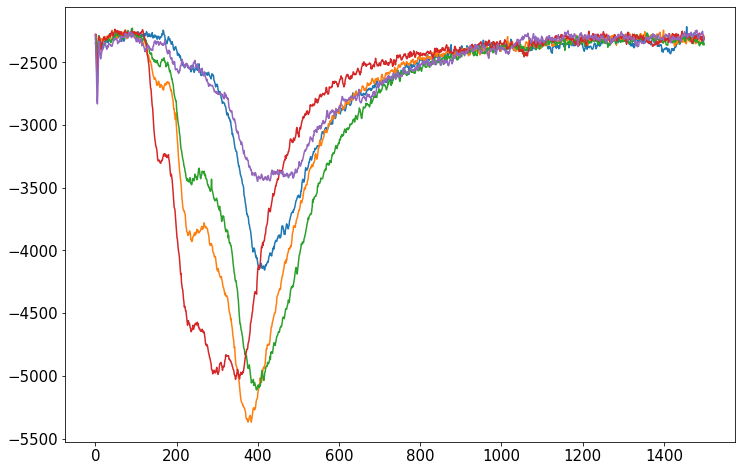

In [1088]:
idxN = find_nearest_idx(x, mirror['x'][find_nearest_idx(mirror['time'], time_pxie[integral_all.argmin()])])+1

print(f'{x[idxN].astype(int)},{y[idxN].astype(int)}')

fig, ax = plt.subplots(figsize = (12,8))
for idx in np.where(indices_bins == idxN)[0]:
    ax.plot(values[idx,:,0])

set_fontsize(ax, 15)

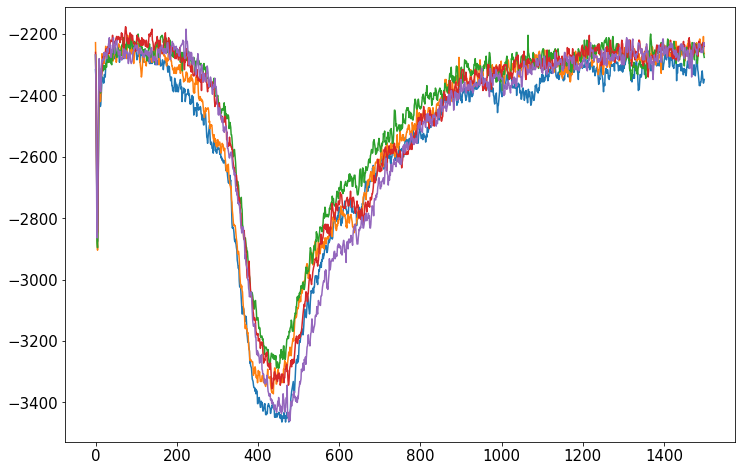

In [1075]:
idxN = find_nearest_idx(x, xi)

fig, ax = plt.subplots(figsize = (12,8))
for idx in np.where(indices_bins == idxN)[0]:
    ax.plot(values[idx,:,0])
set_fontsize(ax, 15)

In [1030]:
from scipy.interpolate import griddata

def create_grid_data(x,y,z,resolution = 50, contour_method='linear'):
    resolution = resolution
    X,Y = np.mgrid[min(x):max(x):resolution,   min(y):max(y):resolution]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

In [1031]:
mask = np.isfinite(integral)
X,Y,Z = create_grid_data(x[mask], y[mask], integral[mask], resolution = 10)

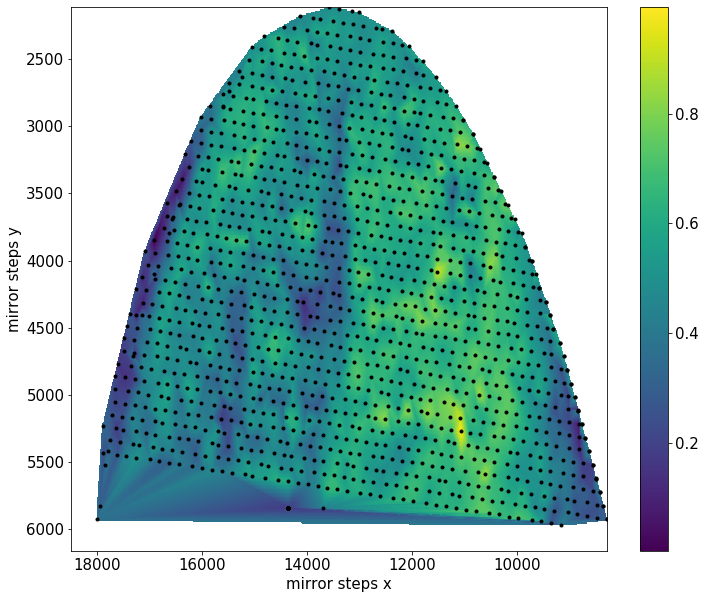

In [1032]:
from scipy.interpolate import griddata
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize = (12,10))
cax = ax.pcolormesh(X,Y,Z)
vmin, vmax = cax.get_clim()
ax.plot(x,y, 'k.')
cbar = fig.colorbar(cax)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('mirror steps x')
ax.set_ylabel('mirror steps y')
cbar.ax.tick_params(labelsize=15)
set_fontsize(ax, 15)

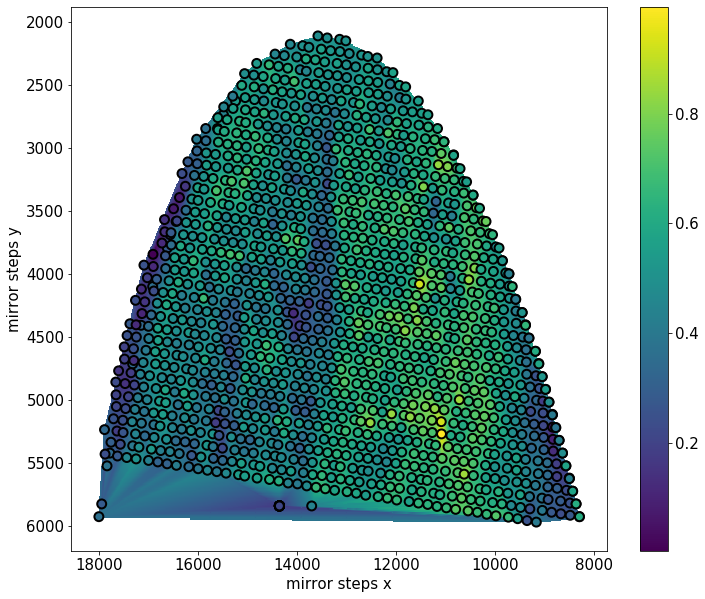

In [1033]:
from scipy.interpolate import griddata

fig, ax = plt.subplots(figsize = (12,10))
cax = ax.pcolormesh(X,Y,Z)
vmin, vmax = cax.get_clim()
ax.scatter(x[mask],y[mask], c = integral[mask], edgecolors = 'k', s = 80, vmin = vmin, vmax = vmax, lw = 2)
cbar = fig.colorbar(cax)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('mirror steps x')
ax.set_ylabel('mirror steps y')
cbar.ax.tick_params(labelsize=15)
set_fontsize(ax, 15)